### Load accident data corresponding to far_part 121

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import collections
import matplotlib.pyplot as plt
%matplotlib inline

## New - With the implementation of eADMS in 2006, the "Events_Sequence" table will replace the "Occurrences"
## table and the "Findings" table will replace the "Seq_of_events" table.

Events_Sequence = pd.read_csv('Events_Sequence.txt', sep = '\t')  ## eADMS coding for accidents after 2006
aircraft = pd.read_excel('aircraft.xlsx')
occurrences = pd.read_csv('Occurrences.txt', sep = ',')
seq_of_events = pd.read_csv('seq_of_events.txt', sep = '\t') ## pre eADMS coding for accidents before 2006

narratives = pd.read_excel('narratives.xlsx')
metaData = pd.read_excel('metaData.xlsx')
events = pd.read_excel('events.xlsx')
engines = pd.read_excel('engines.xlsx')
injury = pd.read_excel('injury.xlsx')
findings = pd.read_excel('findings.xlsx')

In [3]:
metaData['code_iaids'] = metaData['code_iaids'].astype(str)
indices = seq_of_events[seq_of_events['Subj_Code'] == 0].index
seq_of_events.drop(indices, inplace = True)

In [4]:
indices

Int64Index([  8574,  85343, 118963, 128776, 133286, 138309, 163656, 163657,
            230165, 230166, 246474],
           dtype='int64')

### Accident Statistical Summary

#### Total number of accidents in far_part 121

In [5]:
ev_ID = aircraft['ev_id'].values.tolist()

## Remove duplicated event IDs
ev_ID = list(set(ev_ID))

print ('There are {} accidents in NTSB database with far_part equal to 121'.format(len(ev_ID)))
print ('The data ranges from {} to {}'.format(min(events['ev_year'].values), max(events['ev_year'].values)))

There are 2243 accidents in NTSB database with far_part equal to 121
The data ranges from 1982 to 2019


#### Accident vs Aircraft Manufactuer

In [6]:
acft_make_counter = collections.Counter(aircraft['acft_make'].str.title())
acft_make_counter_plot = {k: v for k, v in acft_make_counter.items() if v > 5}

Text(0, 0.5, 'No of accidents')

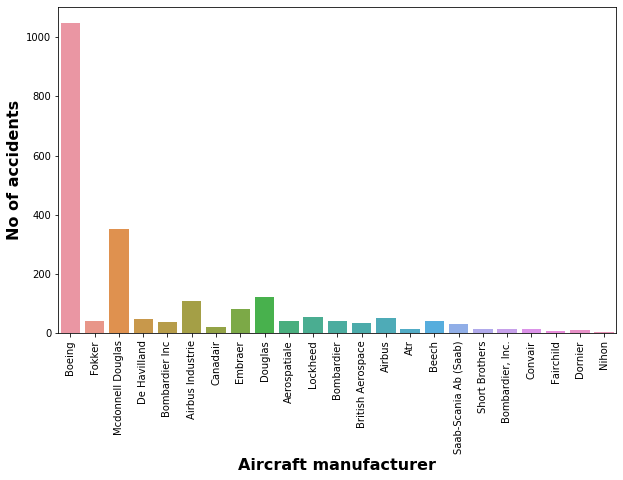

In [7]:
plt.figure(figsize = (10, 6))
sns.barplot(list(acft_make_counter_plot.keys()), list(acft_make_counter_plot.values()))
plt.xticks(rotation=90)
plt.xlabel('Aircraft manufacturer', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of accidents', fontsize = 16, fontweight = 'bold')

#### Accident vs Event Type

In [8]:
ev_type_counter = collections.Counter(events['ev_type'].fillna('Unknown'))
ev_type_keys = ['Accident','Incident','Unknown']

Text(0, 0.5, 'No of events')

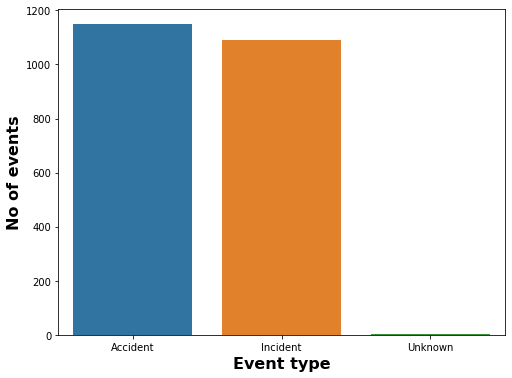

In [9]:
plt.figure(figsize = (8, 6))
sns.barplot(ev_type_keys, list(ev_type_counter.values()))
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Year

Text(0, 0.5, 'No of events')

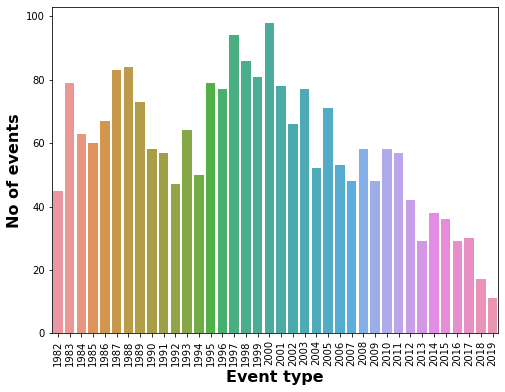

In [10]:
ev_year_counter = collections.Counter(events['ev_year'])

plt.figure(figsize = (8, 6))
sns.barplot(list(ev_year_counter.keys()), list(ev_year_counter.values()))
plt.xticks(rotation=90)
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs State

Text(0, 0.5, 'No of events')

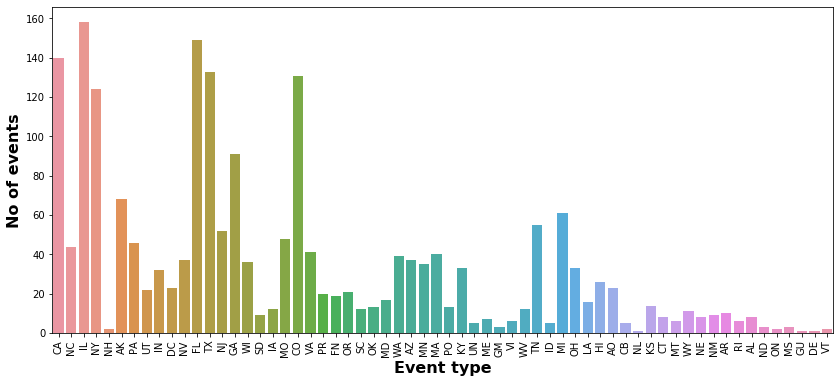

In [11]:
ev_state_counter = collections.Counter(events['ev_state'])

plt.figure(figsize = (14, 6))
sns.barplot(list(ev_state_counter.keys()), list(ev_state_counter.values()))
plt.xticks(rotation=90)
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Wind Gusting

In [12]:
gust_ind_counter = collections.Counter(events['gust_ind'].fillna('Not Reported'))
gust_ind_keys = ['Not Gusting', 'Gusting', 'Unknown', 'Not Reported']

Text(0, 0.5, 'No of events')

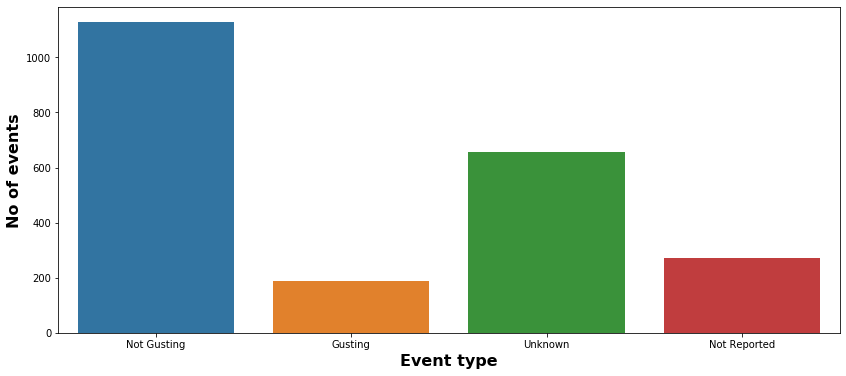

In [13]:
plt.figure(figsize = (14, 6))
sns.barplot(gust_ind_keys, list(gust_ind_counter.values()))
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Airport Elevation

In [14]:
elevation = events['apt_elev'].values
elevation = elevation[~np.isnan(elevation)]

Text(0, 0.5, 'Probability')

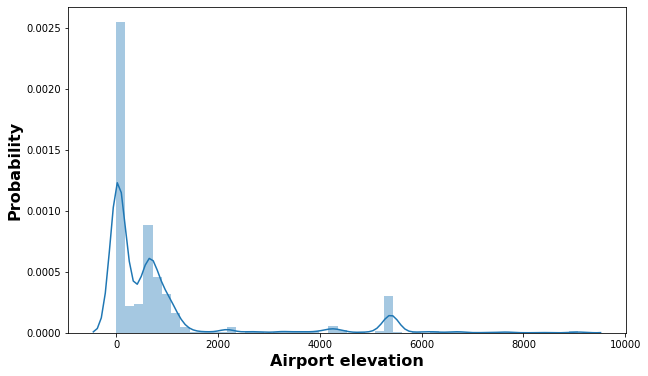

In [15]:
plt.figure(figsize = (10, 6))
sns.distplot(elevation)
plt.xlabel('Airport elevation', fontsize = 16, fontweight = 'bold')
plt.ylabel('Probability', fontsize = 16, fontweight = 'bold')

#### Accident vs Highest Injury

Text(0, 0.5, 'No of events')

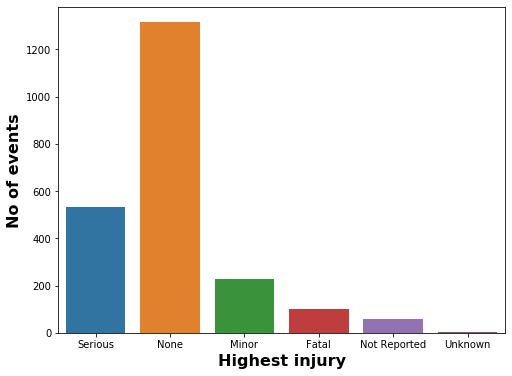

In [16]:
ev_highest_injury_counter = collections.Counter(events['ev_highest_injury'].fillna('Not Reported'))
ev_highest_injury_keys = ['Serious', 'None', 'Minor', 'Fatal', 'Not Reported', 'Unknown']

plt.figure(figsize = (8, 6))
sns.barplot(ev_highest_injury_keys, list(ev_highest_injury_counter.values()))
plt.xlabel('Highest injury', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Location

Text(0, 0.5, 'No of events')

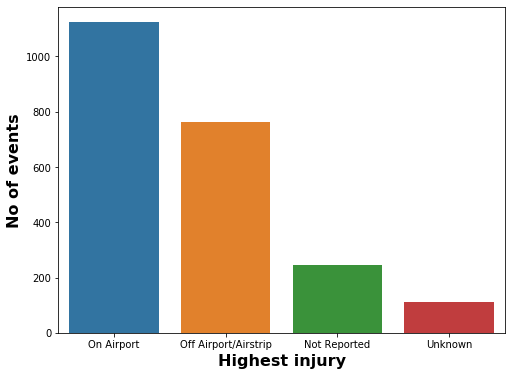

In [17]:
ev_nr_apt_loc_counter = collections.Counter(events['ev_nr_apt_loc'].fillna('Not Reported'))
ev_nr_apt_loc_keys = ['On Airport', 'Off Airport/Airstrip', 'Not Reported', 'Unknown']

plt.figure(figsize = (8, 6))
sns.barplot(ev_nr_apt_loc_keys, list(ev_nr_apt_loc_counter.values()))
plt.xlabel('Highest injury', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Light Condition

In [18]:
light_cond_counter = collections.Counter(events['light_cond'].fillna('Unknown'))

light_cond_keys = ['Day','Night/Dark','Night', 'Not Reported', 'Unknown', 'Dusk', 'Dawn', 'Night//Bright']

Text(0, 0.5, 'No of events')

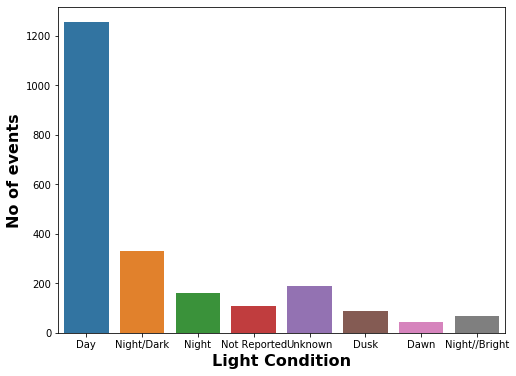

In [19]:
plt.figure(figsize = (8, 6))
sns.barplot(light_cond_keys, list(light_cond_counter.values()))
plt.xlabel('Light Condition', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Engine Type

In [20]:
eng_type_counter = collections.Counter(engines['eng_type'].fillna('Not Reported'))
eng_type_keys = ['Turbo Fan', 'Turbo Prop', 'Unknown', 'Turbo Jet', 'Reciprocating', 'Not Reported', 'Turbo Shaft']

Text(0, 0.5, 'No of events')

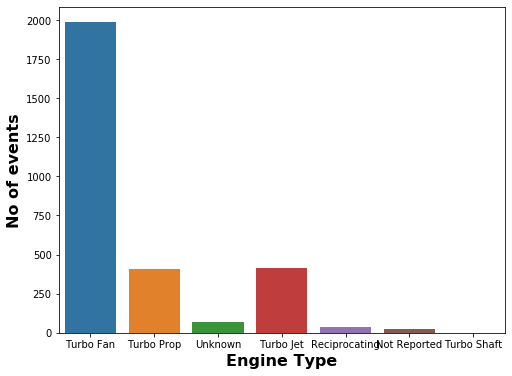

In [21]:
plt.figure(figsize = (8, 6))
sns.barplot(eng_type_keys, list(eng_type_counter.values()))
plt.xlabel('Engine Type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Airframe Hours

Text(0, 0.5, 'Probability')

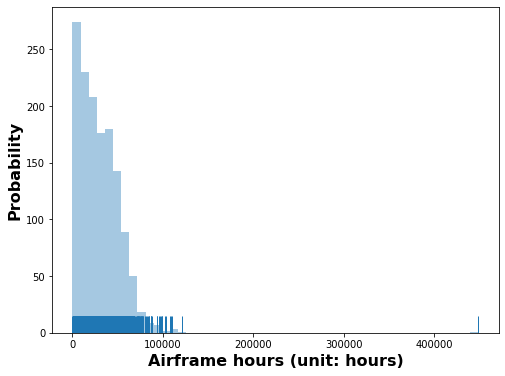

In [22]:
afm_hrs = aircraft['afm_hrs'].values
afm_hrs = afm_hrs[~np.isnan(afm_hrs)]

plt.figure(figsize = (8, 6))
sns.distplot(afm_hrs, kde=False, rug=True)
plt.xlabel('Airframe hours (unit: hours)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Probability', fontsize = 16, fontweight = 'bold')

#### Aircraft Basic Characteristics

In [23]:
aircraft['num_eng']

0       2.0
1       2.0
2       3.0
3       2.0
4       4.0
       ... 
2303    2.0
2304    NaN
2305    2.0
2306    2.0
2307    2.0
Name: num_eng, Length: 2308, dtype: float64

In [24]:
aircraft['oper_pax_cargo']

0        PAX
1       CARG
2       PACA
3       PACA
4       PACA
        ... 
2303     PAX
2304     PAX
2305     PAX
2306     PAX
2307     PAX
Name: oper_pax_cargo, Length: 2308, dtype: object

In [25]:
events['light_cond']

0       DAYL
1       DAYL
2       DAYL
3       DAYL
4       DAYL
        ... 
2238    DAYL
2239      NR
2240    NITE
2241    DAYL
2242    DAYL
Name: light_cond, Length: 2243, dtype: object

In [26]:
import pygraphviz as pgv
from IPython.display import display, Image

def drawImage(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

def drawPDF(dot, fileName):
    return pgv.AGraph(dot).draw(fileName + '.pdf', prog='dot')

## Build Bayesian Network from Event Sequences

In [27]:
ev_ID

['20001208X06952',
 '20001214X35492',
 '20140212X03156',
 '20141003X84008',
 '20001214X35500',
 '20001211X10601',
 '20001214X42592',
 '20001208X08714',
 '20040510X00578',
 '20001212X20729',
 '20110209X55126',
 '20050927X01539',
 '20001212X21288',
 '20001206X02120',
 '20001214X38976',
 '20001213X28483',
 '20050628X00880',
 '20111018X03714',
 '20001213X33244',
 '20001208X07207',
 '20001213X35299',
 '20010110X00217',
 '20001214X43070',
 '20001213X25644',
 '20001214X38649',
 '20001211X14370',
 '20001214X39980',
 '20001212X17522',
 '20030409X00468',
 '20001205X00119',
 '20150116X52840',
 '20001214X36146',
 '20050502X00534',
 '20170608X90705',
 '20001214X37248',
 '20001211X11023',
 '20001211X12036',
 '20001212X23595',
 '20001211X11938',
 '20070426X00458',
 '20001207X05039',
 '20080125X00103',
 '20100503X82523',
 '20091124X94107',
 '20091117X55556',
 '20090921X05830',
 '20021018X05344',
 '20001208X06004',
 '20001211X10544',
 '20001208X08701',
 '20001214X36851',
 '20001213X27446',
 '20110830X6

In [28]:
import re
def calculate_injury_level(ev_ID):
    keys = ['MINR', 'SERS', 'NONE']
    
    Fatal = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'FATL')]['inj_person_count'].values)
    Serious = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'SERS')]['inj_person_count'].values)
    Minor = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'MINR')]['inj_person_count'].values)
    No = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'NONE')]['inj_person_count'].values)
    Total = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'TOTL')]['inj_person_count'].values)
    
    dict_injury = {}
    dict_injury['Fatal'] = Fatal#/Total
    dict_injury['Serious'] = Serious#/Total
    dict_injury['Minor'] = Minor#/Total
    dict_injury['NONE'] = No#/Total
    
    return dict_injury

def deriveNamebyCode(code):
    try:
        label = metaData[metaData['code_iaids'] == code]['meaning'].values[0]
        name = re.sub('[^a-zA-Z]+', '', label)
    except:
        return '', ''
    return name, label

In [29]:
sample_ev_ID = '20001208X09328'
#sample_ev_ID = '20001208X08814'
example = narratives[narratives['ev_id'] == sample_ev_ID]
list(example['narr_accp'])

[]

In [30]:
deriveNamebyCode('2501')

('', '')

In [31]:
seq_of_events[seq_of_events['ev_id'] == sample_ev_ID]

ev_id  Aircraft_Key  Occurrence_No  seq_event_no  group_code  \
226362  20001208X09328             1              1             1           1   
226363  20001208X09328             1              1             2           1   
226364  20001208X09328             1              2             1           2   

        Subj_Code Cause_Factor  Modifier_Code  Person_Code  \
226362      12105            C           1240          0.0   
226363      12105            F           1144          0.0   
226364      24712                        3135       4000.0   

                 lchg_date         lchg_userid  
226362  12/8/2000 12:44:27  dbo                 
226363  12/8/2000 12:44:27  dbo                 
226364  12/8/2000 12:44:27  dbo

In [32]:
occurrences[occurrences['ev_id'] == sample_ev_ID]

ev_id  Aircraft_Key  Occurrence_No  Occurrence_Code  \
20135  20001208X09328             1              1              130   
20136  20001208X09328             1              2              430   

       Phase_of_Flight  Altitude           lchg_date         lchg_userid  
20135              513         0  12/8/2000 12:44:27  dbo                 
20136              504         0  12/8/2000 12:44:27  dbo

In [33]:
aircraft[aircraft['ev_id'] == sample_ev_ID]['afm_hrs']

1977   NaN
Name: afm_hrs, dtype: float64

In [34]:
seq_of_events[seq_of_events['ev_id'] == sample_ev_ID][['seq_event_no', 'Subj_Code', 'Modifier_Code', 'Person_Code']]

seq_event_no  Subj_Code  Modifier_Code  Person_Code
226362             1      12105           1240          0.0
226363             2      12105           1144          0.0
226364             1      24712           3135       4000.0

In [35]:
occurrences[occurrences['ev_id'] == sample_ev_ID]

ev_id  Aircraft_Key  Occurrence_No  Occurrence_Code  \
20135  20001208X09328             1              1              130   
20136  20001208X09328             1              2              430   

       Phase_of_Flight  Altitude           lchg_date         lchg_userid  
20135              513         0  12/8/2000 12:44:27  dbo                 
20136              504         0  12/8/2000 12:44:27  dbo

In [36]:
dictEdges = {}
def addEdges(key):
    if key in dictEdges.keys():
        dictEdges[key] += 1
    else:
        dictEdges[key] = 1

In [37]:
def buildOneGraphRep(sample_ev_ID):
    ev_year = events[events['ev_id'] == sample_ev_ID]['ev_year'].values[0]

    subjectName = []

    g1 = "digraph top {"
    g1 += """size ="12,12"; """
    g1 += "graph [compound=true];"

    if ev_year <= 2006:
        eventSequences = seq_of_events[seq_of_events['ev_id'] == sample_ev_ID][['seq_event_no', 'Subj_Code', 
                                                                                'Modifier_Code', 'Person_Code']]
        ## Construct the subject name
        subjectList = []
        for index, row in eventSequences.iterrows():
            Subj_Code = str(int(row['Subj_Code']))
            Modifier_Code = str(int(row['Modifier_Code']))
            Person_Code = str(int(row['Person_Code']))

            subjectName, subjectLabel = deriveNamebyCode(Subj_Code)
            if Modifier_Code != '0':
                modifierName, modifierLabel = deriveNamebyCode(Modifier_Code)
                
                if len(modifierName) > 0:
                    subjectName = subjectName + modifierName
                    subjectLabel = subjectLabel + ':' + modifierLabel

            g1 += subjectName + ' [label =' + '"' + subjectLabel + '"'+ '];'
            subjectList.append(subjectName)

            if Person_Code != '0':
                personName, personeLabel = deriveNamebyCode(Person_Code)
                g1 += personName + '[label = ' + '"' + personeLabel + '"' + '];'
                g1 += personName + '->' + subjectName + ';'
                addEdges(personName + '->' + subjectName)

        ## construct sequence of occurrence
        eventOccurrences = occurrences[occurrences['ev_id'] == sample_ev_ID][['Occurrence_Code', 'Phase_of_Flight']]
        occurrenceCount = 0
        OccurrenceName = ''
        for index, row in eventOccurrences.iterrows():
            Occurrence_Code = str(row['Occurrence_Code'])
            Phase_of_Flight = str(row['Phase_of_Flight'])

            prevOccurrence = OccurrenceName
            OccurrenceName, OccurrenceLabel  = deriveNamebyCode(Occurrence_Code)
            flightPhaseName, flightPhaseLabel = deriveNamebyCode(Phase_of_Flight)

            g1 += OccurrenceName + ' [label = ' + '"' + OccurrenceLabel + '"' + '];'
            if occurrenceCount == 0:
                for subject in subjectList:
                    g1 += subject + '->' + OccurrenceName + ';'
                    addEdges(subject + '->' + OccurrenceName)

                g1 += flightPhaseName + ' [label = ' + '"' + flightPhaseLabel + '"' + '];'
                g1 += flightPhaseName + '->' + OccurrenceName + ';'
                addEdges(flightPhaseName + '->' + OccurrenceName)

            if occurrenceCount >= 1:
                g1 += prevOccurrence + '->' + OccurrenceName + ';'
                g1 += flightPhaseName + ' [label = ' + '"' + flightPhaseLabel + '"' + '];'
                g1 += flightPhaseName + '->' + OccurrenceName + ';'
                
                addEdges(prevOccurrence + '->' + OccurrenceName)
                addEdges(flightPhaseName + '->' + OccurrenceName)

            occurrenceCount += 1

        ## Outcome of accident
        aircraftDamageLevel = aircraft[aircraft['ev_id'] == sample_ev_ID]['damage'].values[0]
        aircraftDamageName = dictAircraftDamage[aircraftDamageLevel] + 'aircraftdamage'
        aircraftDamageLabel = dictAircraftDamage[aircraftDamageLevel] + ' aircraft damage'
        g1 += aircraftDamageName + '[label = ' + '"'+ aircraftDamageLabel + '"' +'];'
        g1 += OccurrenceName + '->' + aircraftDamageName + ';'
        addEdges(OccurrenceName + '->' + aircraftDamageName)

        personInjury = calculate_injury_level(sample_ev_ID)
        g1 += """subgraph cluster_food{ Fatal; Serious; Minor; NONE; label="Injury";};"""
        for key, value in personInjury.items():
            g1 += OccurrenceName + '->' + key + ';'
            addEdges(OccurrenceName + '->' + key)

        g1 += "}"
        
        return g1

#### Demo

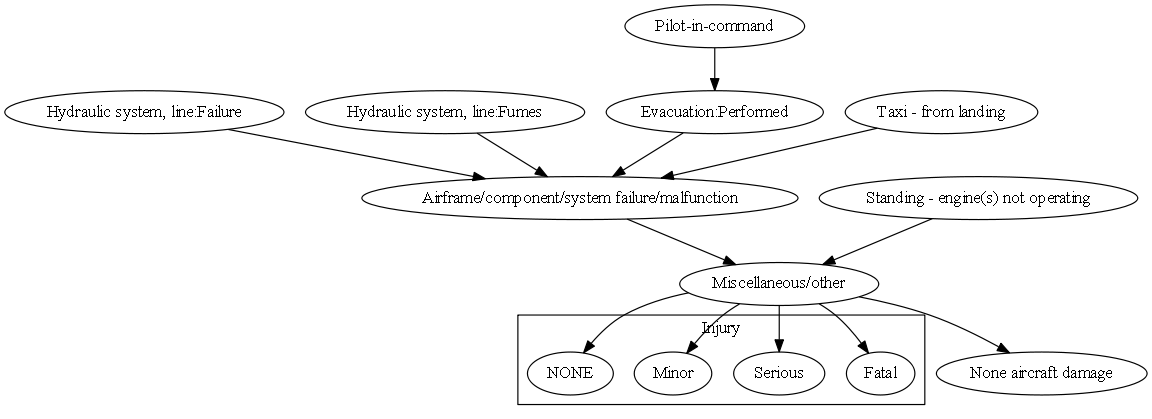

In [44]:
dictAircraftDamage = {'MINR': 'Minor', 'DEST': 'Destroyed', 'NONE': 'None', 'UNK': 'Unknown', 'SUBS': 'Substantial'}
dictEdges = {}
g1 = buildOneGraphRep(sample_ev_ID)
drawImage(g1)

In [45]:
dictEdges

{'Pilotincommand->EvacuationPerformed': 1,
 'HydraulicsystemlineFailure->Airframecomponentsystemfailuremalfunction': 1,
 'HydraulicsystemlineFumes->Airframecomponentsystemfailuremalfunction': 1,
 'EvacuationPerformed->Airframecomponentsystemfailuremalfunction': 1,
 'Taxifromlanding->Airframecomponentsystemfailuremalfunction': 1,
 'Airframecomponentsystemfailuremalfunction->Miscellaneousother': 1,
 'Standingenginesnotoperating->Miscellaneousother': 1,
 'Miscellaneousother->Noneaircraftdamage': 1,
 'Miscellaneousother->Fatal': 1,
 'Miscellaneousother->Serious': 1,
 'Miscellaneousother->Minor': 1,
 'Miscellaneousother->NONE': 1}

#### Add all the connections for accidents before 2006

In [46]:
dictEdges = {}
for sample_ev_ID in ev_ID:
    #print (sample_ev_ID)
    buildOneGraphRep(sample_ev_ID)

In [47]:
dictEdges

{'->Destroyedaircraftdamage': 11,
 '->Fatal': 121,
 '->Serious': 121,
 '->Minor': 121,
 '->NONE': 121,
 'Copilotsecondpilot->InstrumentflightrulesIFRprocedureImproper': 2,
 'Pilotincommand->SupervisionInadequate': 26,
 'Copilotsecondpilot->ManeuverPerformed': 1,
 'Copilotsecondpilot->BecamelostdisorientedInadvertent': 1,
 'Pilotincommand->BecamelostdisorientedInadvertent': 4,
 'unspecifiedperson->MissedapproachInitiated': 1,
 'Pilotincommand->AirspeedNotmaintained': 5,
 'Pilotincommand->StallInadvertent': 8,
 'unspecifiedperson->RemedialactionDelayed': 1,
 'WeatherconditionLowceiling->Lossofcontrolinflight': 3,
 'WeatherconditionFog->Lossofcontrolinflight': 3,
 'LightconditionDawn->Lossofcontrolinflight': 1,
 'InstrumentflightrulesIFRprocedureImproper->Lossofcontrolinflight': 1,
 'SupervisionInadequate->Lossofcontrolinflight': 3,
 'ManeuverPerformed->Lossofcontrolinflight': 1,
 'BecamelostdisorientedInadvertent->Lossofcontrolinflight': 2,
 'MissedapproachInitiated->Lossofcontrolinfligh

In [153]:
len(dictEdges)

6402

#### Construct Bayesian network with PySMILE library

In [48]:
import pysmile
pysmile.License((
	b"SMILE LICENSE cd06be93 97a7a599 29f4a47f "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: ckw9n4254hey3kiszvj6n5k0b "
	b"Issued for: Xiaoge Zhang (zxgcqupt@gmail.com) "
	b"Academic institution: Vanderbilt University "
	b"Valid until: 2020-03-22 "
	b"Issued by BayesFusion activation server"
	),[
	0xf5,0xdc,0x56,0x91,0x01,0x05,0xdb,0x8d,0xf0,0xbf,0x21,0xe9,0x58,0x09,0x41,0x79,
	0x1f,0xd8,0xd4,0xb3,0x0a,0xaf,0x09,0xad,0xf2,0x41,0x58,0x93,0xc2,0x51,0x28,0xb0,
	0x8d,0xad,0x69,0x38,0x8d,0x82,0x43,0x01,0xca,0xd9,0xd3,0xa2,0x5c,0x98,0xe2,0x9a,
	0x99,0xbf,0xa4,0x17,0x4f,0xbb,0xd6,0x9a,0x72,0xf4,0x23,0xf5,0xed,0x94,0x4b,0x8e])

In [52]:
net = pysmile.Network()
net.read_file('VentureBN.xdsl')
net.set_evidence("Forecast", "Moderate")
net.update_beliefs()
beliefs = net.get_node_value("Success")

for i in range(0, len(beliefs)):
    print(net.get_outcome_id("Success", i) + "=" + str(beliefs[i]))

Success=0.25000000000000006
Failure=0.75


In [766]:
aircraft[aircraft['ev_id'] == sample_ev_ID]['afm_hrs'].values[0]

30275.0

In [678]:
engines[engines['ev_id'] == sample_ev_ID]

ev_id  Aircraft_Key  eng_no eng_type eng_mfgr eng_model  \
1266  20001208X08814             1       1       TF      P&W    4056 L   

      power_units hp_or_lbs lchg_userid               lchg_date  \
1266      56000.0       LBS         NaN 2000-12-08 12:33:08.850   

     carb_fuel_injection propeller_type  propeller_make  propeller_model  \
1266                 NaN            NaN             NaN              NaN   

      eng_time_total  eng_time_last_insp  eng_time_overhaul  
1266             NaN                 NaN                NaN

In [512]:
Events_Sequence.head()

ev_id  Aircraft_Key  Occurrence_No  Occurrence_Code  \
0  20001208X08803             1              3           400240   
1  20001212X19469             1              1           550900   
2  20010304X00536             1              1           400350   
3  20010304X00536             2              1           400350   
4  20080109X00036             1              1           551230   

                              Occurrence_Description  phase_no  eventsoe_no  \
0                Enroute - Loss of control in flight       400          240   
1                      Landing - Miscellaneous/other       550          900   
2                  Enroute - Security/criminal event       400          350   
3                  Enroute - Security/criminal event       400          350   
4  Landing-flare/touchdown - Loss of control on g...       551          230   

   Defining_ev            lchg_date lchg_userid  
0            1   5/13/2019 14:50:49        bowl  
1            1   6/25/2015 14:54:25        sedj  
2            1   6/25/2015 15:51:08        sedj  
3            1   6/25/2015 15:51:23        sedj  
4            1  11/16/2017 13:41:08       broda

In [31]:
Events_Sequence.head(2)

ev_id  Aircraft_Key  Occurrence_No  Occurrence_Code  \
0  20001208X08803             1              3           400240   
1  20001212X19469             1              1           550900   

                Occurrence_Description  phase_no  eventsoe_no  Defining_ev  \
0  Enroute - Loss of control in flight       400          240            1   
1        Landing - Miscellaneous/other       550          900            1   

            lchg_date lchg_userid  
0  5/13/2019 14:50:49        bowl  
1  6/25/2015 14:54:25        sedj

In [32]:
new = Events_Sequence["Occurrence_Description"].str.split("-", n = 1, expand = True)

Events_Sequence.insert(5, 'Phase', 'Unknown')
Events_Sequence.insert(6, 'Description', 'Unknown')
Events_Sequence['Phase'] = new[0].str.strip()
Events_Sequence['Description'] = new[1].str.strip()

In [33]:
Events_Sequence.head()

ev_id  Aircraft_Key  Occurrence_No  Occurrence_Code  \
0  20001208X08803             1              3           400240   
1  20001212X19469             1              1           550900   
2  20010304X00536             1              1           400350   
3  20010304X00536             2              1           400350   
4  20080109X00036             1              1           551230   

                              Occurrence_Description    Phase  \
0                Enroute - Loss of control in flight  Enroute   
1                      Landing - Miscellaneous/other  Landing   
2                  Enroute - Security/criminal event  Enroute   
3                  Enroute - Security/criminal event  Enroute   
4  Landing-flare/touchdown - Loss of control on g...  Landing   

                                   Description  phase_no  eventsoe_no  \
0                    Loss of control in flight       400          240   
1                          Miscellaneous/other       550          900   
2                      Security/criminal event       400          350   
3                      Security/criminal event       400          350   
4  flare/touchdown - Loss of control on ground       551          230   

   Defining_ev            lchg_date lchg_userid  
0            1   5/13/2019 14:50:49        bowl  
1            1   6/25/2015 14:54:25        sedj  
2            1   6/25/2015 15:51:08        sedj  
3            1   6/25/2015 15:51:23        sedj  
4            1  11/16/2017 13:41:08       broda

In [34]:
second_phases = ['cruise', 'flare/touchdown', 'aerobatics', 'climb to cruise', 'landing roll', 'IFR initial approach', 
                 'IFR final approach', 'IFR missed approach', 'low-alt flying', 'VFR go-around', 'descent', 
                 'VFR pattern final', 'rejected takeoff', 'circling (IFR)']
def f(x):
    if '-' in x:
        if x.split('-')[0].strip() in second_phases:
            return x.split('-', 1)[1].strip()
    else:
        return x

Events_Sequence['Description'] = Events_Sequence['Description'].map(f)

#### Accident proportion by phases

In [35]:
df_events_sequences = Events_Sequence[Events_Sequence['ev_id'].isin(ev_ID)]

df_events_sequences.reset_index(inplace=True)
del df_events_sequences['index']

In [36]:
df_events_sequences.head()

ev_id  Aircraft_Key  Occurrence_No  Occurrence_Code  \
0  20080118X00073             1              1           200200   
1  20080118X00073             2              1           200200   
2  20080222X00229             1              1           401900   
3  20080222X00229             1              2           402900   
4  20080305X00267             1              1           404360   

                          Occurrence_Description            Phase  \
0             Pushback/towing - Ground collision  Pushback/towing   
1             Pushback/towing - Ground collision  Pushback/towing   
2  Enroute-climb to cruise - Miscellaneous/other          Enroute   
3           Enroute-cruise - Miscellaneous/other          Enroute   
4         Enroute-descent - Turbulence encounter          Enroute   

            Description  phase_no  eventsoe_no  Defining_ev  \
0      Ground collision       200          200            1   
1      Ground collision       200          200            1   
2   Miscellaneous/other       401          900            1   
3   Miscellaneous/other       402          900            0   
4  Turbulence encounter       404          360            1   

             lchg_date lchg_userid  
0    2/2/2009 13:27:45      mcgk-c  
1    2/2/2009 13:28:51      mcgk-c  
2  12/23/2008 15:40:20        stam  
3  12/23/2008 15:40:20        stam  
4   7/28/2009 14:59:12        grol

In [37]:
import collections

counter = collections.Counter(df_events_sequences['Phase'])
counter

Counter({'Pushback/towing': 20,
         'Enroute': 170,
         'Taxi': 48,
         'Standing': 41,
         'Takeoff': 34,
         'Landing': 91,
         'Prior to flight': 25,
         'Initial climb': 37,
         'Approach': 46,
         'Pushback/tow': 14,
         'Post': 6,
         'Other': 9,
         'Unknown': 4,
         'Emergency descent': 2,
         'Uncontrolled descent': 1,
         'After landing': 4})

Text(0, 0.5, 'Proportion')

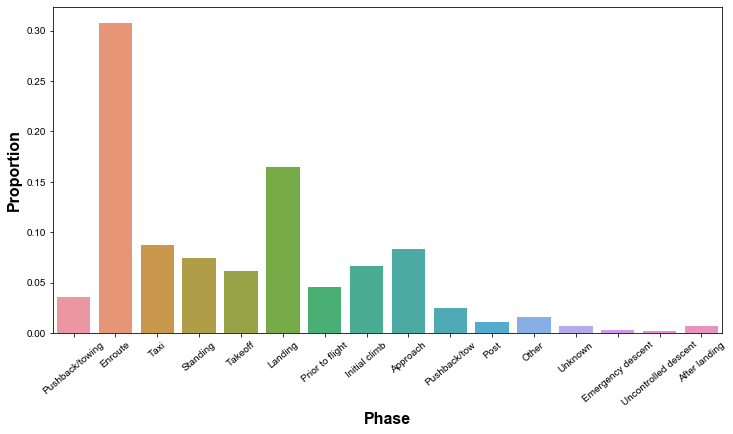

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

proportion = np.array(list(counter.values()))/sum(list(counter.values()))

plt.figure(figsize = (12, 6))
sns.barplot(x = list(counter.keys()), y = proportion)
sns.set(font_scale=1)
plt.xticks(rotation=40)
plt.xlabel('Phase', fontsize = 16, fontweight = 'bold')
plt.ylabel('Proportion', fontsize = 16, fontweight = 'bold')

#### Create raw transition graph from the Table Events_Sequence

In [39]:
nodeDesp = list(df_events_sequences['Description'].unique())

In [40]:
def findDespByID(ID):
    desp = df_events_sequences.loc[df_events_sequences['ev_id'] == ID]
    return list(desp['Description'])

dictEdges = {}

for ID in df_events_sequences['ev_id']:
    desp = findDespByID(ID)
    
    if len(desp) == 1:
        nodeFrom = nodeDesp.index(desp[0])
        nodeTo = nodeDesp.index(desp[0])
        
        key = str(nodeFrom)
        
        if key in dictEdges.keys():
            dictEdges[key] = dictEdges[key] + 1  
        else:
            dictEdges[key] = 1    
    else:
        for i in range(len(desp) - 1):
            nodeFrom = nodeDesp.index(desp[i])
            nodeTo = nodeDesp.index(desp[i+1])

            key = str(nodeFrom) + '->' + str(nodeTo)
            
            if key in dictEdges.keys():
                dictEdges[key] = dictEdges[key] + 1
            else:
                dictEdges[key] = 1

In [41]:
import operator

sorted_x = sorted(dictEdges.items(), key=operator.itemgetter(1))

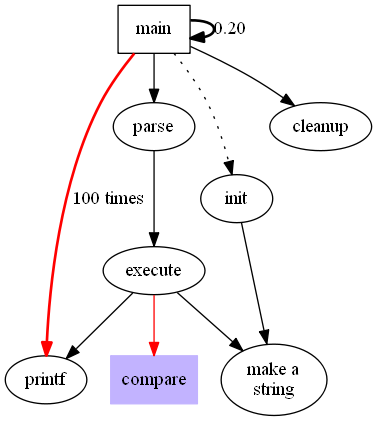

In [43]:
g1 = """digraph top {
    size ="12,12";
    main [shape=box]; /* this is a comment */
    main -> parse [weight=80];
    main -> main [style=bold, label="0.20"];
    parse -> execute;
    main -> init [style=dotted];
    main -> cleanup;
    execute -> { make_string; printf}
    init -> make_string;
    edge [color=red]; // so is this
    main -> printf [style=bold,label="100 times"];
    make_string [label="make a\nstring"];
    node [shape=box,style=filled,color=".7 .3 1.0"];
    execute -> compare;
}"""


drawImage(g1)

In [44]:
def create_graph():
    g = """digraph top {
    size ="12,12";"""
    
    for key, value in dictEdges.items():
        
        if '->' in key:
            nodeFrom = key.split('->')[0]
            nodeTo = key.split('->')[1]
            g += str(nodeFrom) + '->' + str(nodeTo) + '[style=bold, label=' + str(value) + ']'
  
    g += '}'
    
    return g

In [45]:
nodeDesp[21]

'Fire/smoke (non-impact)'

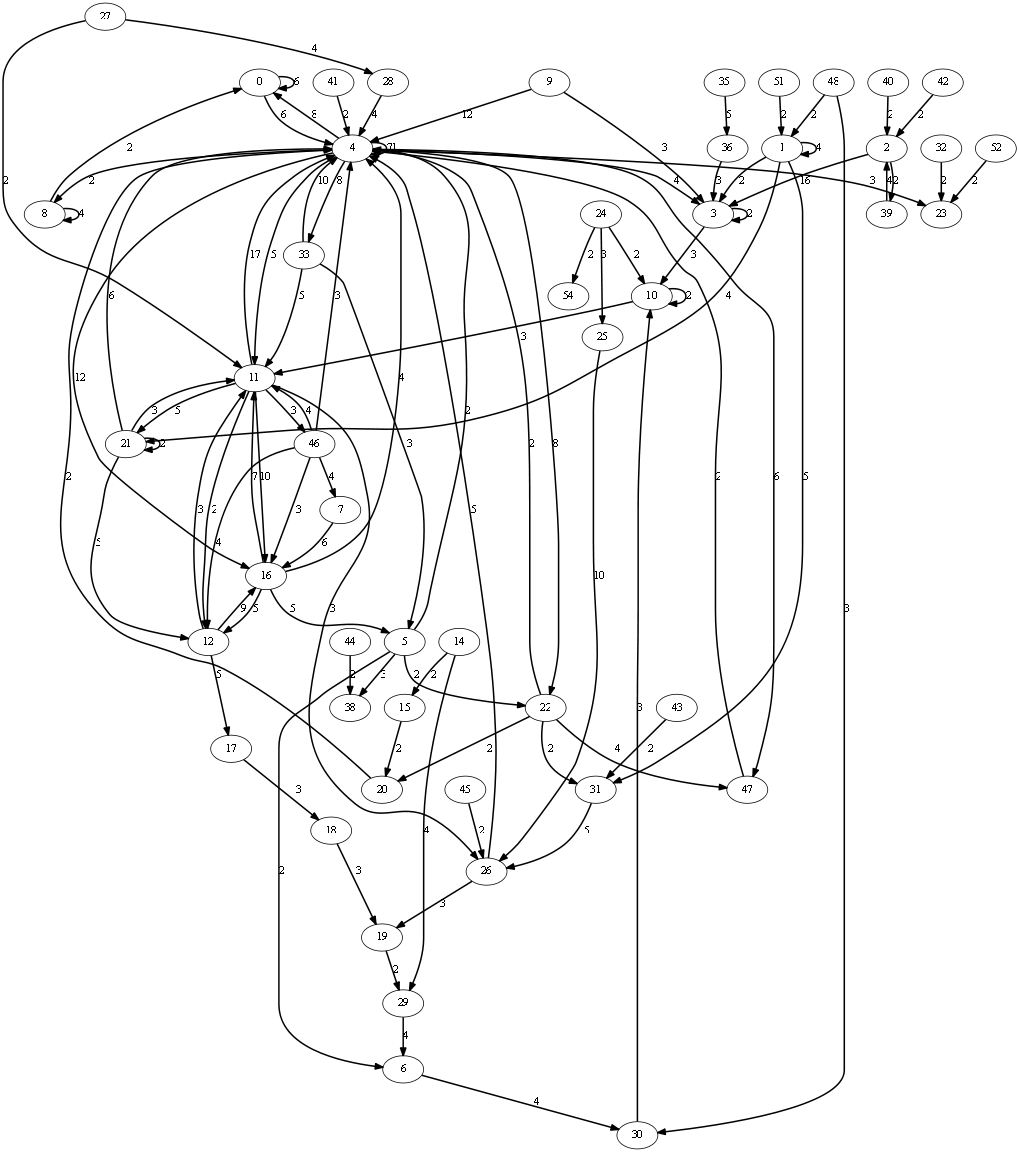

In [46]:
g = create_graph()
drawPDF(g, 'test')
drawImage(g)

#### Create compressed network from Table seq_of_events

In [47]:
initialIDs = set(occurrences['ev_id']).intersection(set(seq_of_events['ev_id']))
part120_IDs = set(sum(aircraft.values.tolist(), []))

ev_ID = list(initialIDs.intersection(part120_IDs))

In [48]:
eventCodes.head()

code                                        meaning
0   100                                ABRUPT MANEUVER
1   110                ALTITUDE DEVIATION,UNCONTROLLED
2   120                                    CARGO SHIFT
3   130  AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION
4   131                  PROPELLER FAILURE/MALFUNCTION

In [91]:
df_seq_of_events = seq_of_events[seq_of_events['ev_id'].isin(ev_ID)].copy()

df_seq_of_events.drop(df_seq_of_events.index[6218], inplace = True)
df_seq_of_events.reset_index(inplace=True)
del df_seq_of_events['index']

In [92]:
df_seq_of_events.head()

ev_id  Aircraft_Key  Occurrence_No  seq_event_no  group_code  \
0  20030314X00332             1              1             1           1   
1  20001212X18554             1              1             1           2   
2  20001212X18554             1              1             2           2   
3  20001212X18554             1              1             3           4   
4  20001212X18554             1              1             4           2   

   Subj_Code Cause_Factor  Modifier_Code  Person_Code           lchg_date  \
0      10403            C           1137          0.0   7/6/2004 15:23:06   
1      24602            F           3130       4000.0  1/10/2001 10:43:11   
2      24608            C           3130       4111.0  1/10/2001 10:43:11   
3      90000            F              0       6110.0  1/10/2001 10:43:11   
4      24604            F           3134       4111.0  1/10/2001 10:43:11   

          lchg_userid  
0  JOHB                
1  dbo                 
2  dbo                 
3  dbo                 
4  dbo

In [93]:
df_seq_of_events.insert(6, 'Grouped_Subject_Code', None)
df_seq_of_events.insert(7, 'Simple_Subject_Code', None)

In [94]:
df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Subj_Code'].copy()
df_seq_of_events['Simple_Subject_Code'] = df_seq_of_events['Subj_Code'].copy()

def updateGroupSubjectCode(code):
    codeList = []
    
    if int(str(code)[:-2] + '00') in codeList:
        return code
    else:
        return int(str(code)[:-2] + '00')

df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Grouped_Subject_Code'].map(updateGroupSubjectCode)
df_seq_of_events['Simple_Subject_Code'] = df_seq_of_events['Subj_Code'].map(updateGroupSubjectCode)

In [95]:
df_seq_of_events.head()

ev_id  Aircraft_Key  Occurrence_No  seq_event_no  group_code  \
0  20030314X00332             1              1             1           1   
1  20001212X18554             1              1             1           2   
2  20001212X18554             1              1             2           2   
3  20001212X18554             1              1             3           4   
4  20001212X18554             1              1             4           2   

   Subj_Code  Grouped_Subject_Code  Simple_Subject_Code Cause_Factor  \
0      10403                 10400                10400            C   
1      24602                 24600                24600            F   
2      24608                 24600                24600            C   
3      90000                 90000                90000            F   
4      24604                 24600                24600            F   

   Modifier_Code  Person_Code           lchg_date         lchg_userid  
0           1137          0.0   7/6/2004 15:23:06  JOHB                
1           3130       4000.0  1/10/2001 10:43:11  dbo                 
2           3130       4111.0  1/10/2001 10:43:11  dbo                 
3              0       6110.0  1/10/2001 10:43:11  dbo                 
4           3134       4111.0  1/10/2001 10:43:11  dbo

In [96]:
eventCodes[eventCodes['code'] == 31100]

Empty DataFrame
Columns: [code, meaning]
Index: []

In [97]:
def findKeyByValue(val, highLevelGroup):
    for k, v in highLevelGroup.items():
        if val in v:
            return k
        
def mapToHigherLevel(code):
    
    highLevelGroup = {
        9910001: [10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 11300, 13000],
        9912001: [12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13100],
        9913001: [14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200,
                  15300, 15400, 15600, 15700, 15800, 15900, 16000, 16700, 16900],
        9914001: [17000, 17100, 17200, 17300],
        9915001: [18100, 18200, 18300, 18400, 18500, 19000, 19300],
        9916001: [21000, 21100],
        9918001: [19200, ],
        9919001: [20200],
        9920001: [20000],
        9930001: [20100],
        9940001: [22000, 22100, 22200, 22300, 22400, 22500, 22600, 22700, 22800, 22900, 23000, 23100, 23300],
        9950001: [24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700, 25000],
        9960001: [30000, 30001, 31000, 31100, 31200, 32000, 33000, 33100, 34000, 
                  33200, 33400, 33500, 33600, 33700, 34100, 34200, 34300, 40000, 40001, 50001, 60000],
        9970001: [35000, 35100, 35200, 35300, 70100, 80100, 80200, 80300, 80400, 84100, 84200,
                  70000, 80000, 82000, 82100, 82200, 84000],
        9980001: [90000, 91000, 92000, 93000, 90100, 90200, 91100, 91200, 91300, 91400, 91500, 92200, 92300, 92400, 
                  93100, 93200, 93300]
    }
    
    
    allValues = sum(list(highLevelGroup.values()), [])
    
    if code in allValues:
        key = findKeyByValue(code, highLevelGroup)
        return key
    else:
        return code
    
df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Grouped_Subject_Code'].map(mapToHigherLevel)

In [98]:
df_seq_of_events.head(2)

ev_id  Aircraft_Key  Occurrence_No  seq_event_no  group_code  \
0  20030314X00332             1              1             1           1   
1  20001212X18554             1              1             1           2   

   Subj_Code  Grouped_Subject_Code  Simple_Subject_Code Cause_Factor  \
0      10403               9910001                10400            C   
1      24602               9950001                24600            F   

   Modifier_Code  Person_Code           lchg_date         lchg_userid  
0           1137          0.0   7/6/2004 15:23:06  JOHB                
1           3130       4000.0  1/10/2001 10:43:11  dbo

In [99]:
subjectCodes = sorted(list(df_seq_of_events['Grouped_Subject_Code'].unique()))

In [100]:
df_seq_of_events.head(3)

ev_id  Aircraft_Key  Occurrence_No  seq_event_no  group_code  \
0  20030314X00332             1              1             1           1   
1  20001212X18554             1              1             1           2   
2  20001212X18554             1              1             2           2   

   Subj_Code  Grouped_Subject_Code  Simple_Subject_Code Cause_Factor  \
0      10403               9910001                10400            C   
1      24602               9950001                24600            F   
2      24608               9950001                24600            C   

   Modifier_Code  Person_Code           lchg_date         lchg_userid  
0           1137          0.0   7/6/2004 15:23:06  JOHB                
1           3130       4000.0  1/10/2001 10:43:11  dbo                 
2           3130       4111.0  1/10/2001 10:43:11  dbo

In [101]:
def findEventSequence(ev_id):
    seqs = df_seq_of_events.loc[df_seq_of_events['ev_id'] == ev_id][['seq_event_no', 'Grouped_Subject_Code']]
    return seqs.drop_duplicates(subset = ['seq_event_no', 'Grouped_Subject_Code'])

def findEventOutcomes(ev_id):
    outcomes = occurrences.loc[occurrences['ev_id'] == ev_id][['Occurrence_No', 'Occurrence_Code']].copy()
    return outcomes.drop_duplicates(subset = ['Occurrence_No', 'Occurrence_Code'])


dictEventSequences = {}
for ID in ev_ID:
    
    seq = findEventSequence(ID)
    leafNodes = []

    if len(seq) > 0:
        for i in range(len(seq) - 1):
            if seq.iloc[i]['seq_event_no'] < seq.iloc[i+1]['seq_event_no']:
                codeFrom = seq.iloc[i]['Grouped_Subject_Code']
                codeTo = seq.iloc[i+1]['Grouped_Subject_Code']

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictEventSequences.keys():
                    dictEventSequences[key] += 1
                else:
                    dictEventSequences[key] = 1 
            else:
                leafNodes.append(seq.iloc[i]['Grouped_Subject_Code'])


        leafNodes.append(seq.iloc[-1]['Grouped_Subject_Code'])
        outcomes = findEventOutcomes(ID)

        ## connect leaft Nodes with event outcomes:
        for i in leafNodes:
            codeFrom = i
            codeTo = outcomes.iloc[0]['Occurrence_Code']

            key = str(codeFrom) + '->' + str(codeTo)
            if key in dictEventSequences.keys():
                dictEventSequences[key] += 1
            else:
                dictEventSequences[key] = 1

        outcomeLens = outcomes.shape[0]

        if outcomeLens > 1:
            for i in range(outcomeLens - 1):
                codeFrom = outcomes.iloc[i]['Occurrence_Code']
                codeTo = outcomes.iloc[i+1]['Occurrence_Code']

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictEventSequences.keys():
                    dictEventSequences[key] += 1
                else:
                    dictEventSequences[key] = 1

In [102]:
def createBN():
    occurrencesCodes = list(set(occurrences['Occurrence_Code']))
    
    g = """digraph top {
    \tsize ="12,12"; \n \t"""
    
    g += """bgcolor="transparent"; \n """
    g_node_style = ''
    
    threshold = 10
    
    count = 0
    for key, value in dictEventSequences.items():
        
        #if count < 100:
        if '->' in key:
            nodeFrom = int(key.split('->')[0])
            nodeTo = int(key.split('->')[1])

            #if nodeFrom != nodeTo:
            #    print (nodeFrom, '-->', nodeTo)

            if nodeFrom in occurrencesCodes and value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(value) + ', fontsize=16, penwidth=3, \
                color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'

                g_node_style += str(nodeFrom) + """ [style=filled, color="gold"]"""
                g_node_style += '\n\t'
            elif nodeTo in occurrencesCodes and value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(value) + ', fontsize=16, penwidth=3, \
                color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'

                g_node_style += str(nodeTo) + """ [style=filled, color="gold"]"""
                g_node_style += '\n\t'
            elif value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [style=bold, label=' + str(value) + ', fontsize=16, \
                            penwidth=3, color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'
                
                g_node_style += str(nodeTo) + """ [style=filled, color="green", fontsize = 16]"""
                g_node_style += '\n\t'

            #count += 1
      
    g += g_node_style
    g = g[:-1]
    g += '}'
    
    return g

In [103]:
len(subjectCodes)

15

In [104]:
eventCodes[eventCodes['code'] == 10001]

code                    meaning
633  10001  FUSELAGE,CREW COMPARTMENT

In [105]:
subjectCodes

[9910001,
 9912001,
 9913001,
 9914001,
 9915001,
 9916001,
 9918001,
 9919001,
 9920001,
 9930001,
 9940001,
 9950001,
 9960001,
 9970001,
 9980001]

In [106]:
dictSubjectCodes = {}
for i in range(1, len(subjectCodes)+1):
    dictSubjectCodes[subjectCodes[i-1]] = i

In [107]:
dictEventSequences

{'9920001->9950001': 148,
 '9950001->240': 93,
 '9910001->9910001': 216,
 '9910001->130': 200,
 '9910001->9950001': 182,
 '9950001->9910001': 91,
 '9940001->130': 27,
 '130->320': 5,
 '9913001->9914001': 18,
 '9914001->9950001': 48,
 '9950001->9950001': 669,
 '9950001->171': 19,
 '171->430': 10,
 '9920001->240': 136,
 '9950001->430': 112,
 '9970001->430': 14,
 '9980001->430': 4,
 '430->430': 11,
 '9950001->130': 182,
 '130->230': 8,
 '9912001->140': 2,
 '9912001->9950001': 68,
 '130->340': 6,
 '9920001->9940001': 47,
 '9940001->240': 55,
 '9913001->130': 45,
 '9913001->9913001': 166,
 '130->351': 5,
 '351->171': 9,
 '9919001->9950001': 70,
 '9950001->9920001': 67,
 '9920001->9920001': 147,
 '9920001->310': 6,
 '9960001->9950001': 66,
 '9940001->160': 2,
 '9950001->160': 24,
 '9950001->9919001': 42,
 '9919001->360': 1,
 '9919001->310': 53,
 '9950001->310': 119,
 '9912001->9912001': 122,
 '9912001->130': 88,
 '9940001->9940001': 52,
 '9940001->9950001': 66,
 '9915001->9918001': 4,
 '9914

In [108]:
eventCodes[eventCodes['code'] == 320]

code                                       meaning
37   320  ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER

In [109]:
eventCodes.head()

code                                        meaning
0   100                                ABRUPT MANEUVER
1   110                ALTITUDE DEVIATION,UNCONTROLLED
2   120                                    CARGO SHIFT
3   130  AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION
4   131                  PROPELLER FAILURE/MALFUNCTION

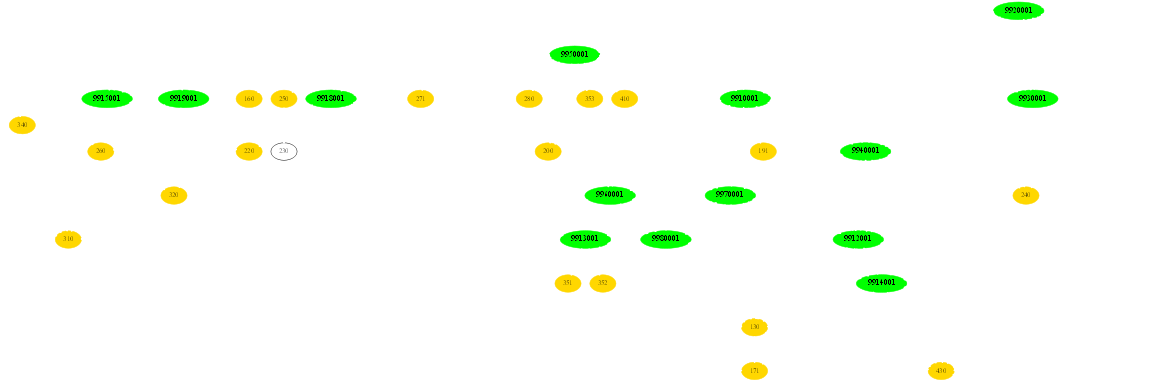

In [119]:
BN = createBN()
drawImage(BN)

In [118]:
drawPDF(BN, 'BN')

### Challenges:

#### 1. How to detect loop in the constructed graph
#### 2. How to break the loop
#### 3. Visualization --> too many nodes

In [320]:
df_seq_of_events.head()

ev_id  Aircraft_Key  Occurrence_No  seq_event_no  group_code  \
0  20030314X00332             1              1             1           1   
1  20001212X18554             1              1             1           2   
2  20001212X18554             1              1             2           2   
3  20001212X18554             1              1             3           4   
4  20001212X18554             1              1             4           2   

   Subj_Code  Grouped_Subject_Code  Simple_Subject_Code Cause_Factor  \
0      10403               9910001                10400            C   
1      24602               9950001                24600            F   
2      24608               9950001                24600            C   
3      90000               9980001                90000            F   
4      24604               9950001                24600            F   

   Modifier_Code  Person_Code           lchg_date         lchg_userid  
0           1137          0.0   7/6/2004 15:23:06  JOHB                
1           3130       4000.0  1/10/2001 10:43:11  dbo                 
2           3130       4111.0  1/10/2001 10:43:11  dbo                 
3              0       6110.0  1/10/2001 10:43:11  dbo                 
4           3134       4111.0  1/10/2001 10:43:11  dbo

In [321]:
def findEventSequenceSimpleCode(ev_id):
    seqs = df_seq_of_events.loc[df_seq_of_events['ev_id'] == ev_id][['seq_event_no', 'Simple_Subject_Code']]
    return seqs.drop_duplicates(subset = ['seq_event_no', 'Simple_Subject_Code'])

def findEventOutcomesSimpleCode(ev_id):
    outcomes = occurrences.loc[occurrences['ev_id'] == ev_id][['Occurrence_No', 'Occurrence_Code']].copy()
    return outcomes.drop_duplicates(subset = ['Occurrence_No', 'Occurrence_Code'])

In [322]:
dictBN = {}
nodeList = []

for ID in ev_ID:
    
    seq = findEventSequenceSimpleCode(ID)
    leafNodes = []

    if len(seq) > 0:
        for i in range(len(seq) - 1):
            if seq.iloc[i]['seq_event_no'] < seq.iloc[i+1]['seq_event_no']:
                codeFrom = seq.iloc[i]['Simple_Subject_Code']
                codeTo = seq.iloc[i+1]['Simple_Subject_Code']
                
                nodeList.append(codeFrom)
                nodeList.append(codeTo)

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictBN.keys():
                    dictBN[key] += 1
                else:
                    dictBN[key] = 1 
            else:
                leafNodes.append(seq.iloc[i]['Simple_Subject_Code'])

        leafNodes.append(seq.iloc[-1]['Simple_Subject_Code'])
        outcomes = findEventOutcomesSimpleCode(ID)

        ## connect leaft Nodes with event outcomes:
        for i in leafNodes:
            codeFrom = i
            codeTo = outcomes.iloc[0]['Occurrence_Code']
            
            nodeList.append(codeFrom)
            nodeList.append(codeTo)

            key = str(codeFrom) + '->' + str(codeTo)
            if key in dictBN.keys():
                dictBN[key] += 1
            else:
                dictBN[key] = 1

        outcomeLens = outcomes.shape[0]

        if outcomeLens > 1:
            for i in range(outcomeLens - 1):
                codeFrom = outcomes.iloc[i]['Occurrence_Code']
                codeTo = outcomes.iloc[i+1]['Occurrence_Code']
                
                nodeList.append(codeFrom)
                nodeList.append(codeTo)

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictBN.keys():
                    dictBN[key] += 1
                else:
                    dictBN[key] = 1

#### Construct transition matrix

In [46]:
#### Label each node with a sequential number
#### Detect loops in the network 
#### Find the direction of observed node --> consequence

import networkx as nx
G = nx.DiGraph()

count = len(set(nodeList)) 
nodeIDList = list(set(nodeList))
TP = np.zeros(shape = (count, count))
    
## add node
for i in range(1, count):
    G.add_node(i)

## add edges
for i in dictBN:
    nodeFrom, nodeTo = int(i.split('->')[0]), int(i.split('->')[1])
    #print (nodeFrom, nodeTo)
    #if nodeFrom != nodeTo:
        #print (str(nodeFrom) + '->' + str(nodeTo))
        #print (dictBN[str(nodeFrom) + '->' + str(nodeTo)])
    G.add_edge(nodeFrom, nodeTo)
        
    if nodeTo == 290:
        #pass
        print (str(nodeFrom) + '->' + str(nodeTo), dictBN[i])
        
    TP[nodeIDList.index(nodeFrom), nodeIDList.index(nodeTo)] = dictBN[i]
    
    #print (nodeIDList.index(nodeFrom), nodeIDList.index(nodeTo), dictBN[i])
    
    if nodeIDList.index(nodeFrom) == 1:
        pass
        #print (nodeIDList.index(nodeFrom))

192->290 1
196->290 1
130->290 1


In [47]:
TP

array([[6., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 6., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [48]:
N = TP.shape[0]

for i in range(TP.shape[0]):
    if sum(TP[i, :]) == 0:
        TP[i, i] = 1

In [49]:
row_sums = TP.sum(axis=1)
TP = TP / row_sums[:, np.newaxis]

In [50]:
nodeIDs = set(nodeList)

for id in nodeIDs:
    try:
        res = nx.find_cycle(G, source = id, orientation='original')
        if id == res[0][0]:
            print (res)
    except:
        pass

[(12800, 12800, 'forward')]
[(24700, 80000, 'forward'), (80000, 91300, 'forward'), (91300, 24700, 'forward')]
[(80000, 91300, 'forward'), (91300, 24700, 'forward'), (24700, 80000, 'forward')]
[(130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward'), (192, 130, 'forward')]
[(140, 140, 'forward')]
[(10400, 10400, 'forward')]
[(160, 200, 'forward'), (200, 160, 'forward')]
[(91300, 24700, 'forward'), (24700, 80000, 'forward'), (80000, 91300, 'forward')]
[(192, 130, 'forward'), (130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward')]
[(200, 160, 'forward'), (160, 200, 'forward')]
[(12500, 12500, 'forward')]
[(230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward'), (192, 130, 'forward'), (130, 230, 'forward')]
[(310, 192, 'forward'), (192, 130, 'forward'), (130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward')]
[(12100, 31100, 'forward'), (31100, 12100, 'forward')]
[(340, 310, 'forward'), (310, 192

### Forward propagation

In [51]:
set(df_seq_of_events['Simple_Subject_Code'])

{10000,
 10100,
 10200,
 10300,
 10400,
 10500,
 10600,
 10700,
 10800,
 11300,
 12000,
 12100,
 12200,
 12300,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 14000,
 14100,
 14200,
 14300,
 14400,
 14500,
 14600,
 14700,
 14800,
 14900,
 15000,
 15100,
 15200,
 15300,
 15400,
 15600,
 15700,
 15800,
 15900,
 16000,
 16700,
 16900,
 17000,
 17100,
 17200,
 17300,
 18100,
 18200,
 18300,
 18400,
 18500,
 19000,
 19200,
 19300,
 20000,
 20100,
 20200,
 21000,
 21100,
 22000,
 22100,
 22200,
 22300,
 22400,
 22500,
 22600,
 22700,
 22800,
 22900,
 23000,
 23100,
 23300,
 24000,
 24100,
 24200,
 24300,
 24400,
 24500,
 24600,
 24700,
 25000,
 30000,
 31100,
 31200,
 32000,
 33000,
 33100,
 33200,
 33400,
 33500,
 33600,
 33700,
 34000,
 34100,
 34200,
 34300,
 35000,
 35100,
 35200,
 35300,
 40000,
 60000,
 70000,
 70100,
 80000,
 80100,
 80200,
 80300,
 80400,
 82000,
 82100,
 82200,
 84000,
 84100,
 84200,
 90000,
 90100,
 90200,
 91000,
 91100,
 91200,
 91300,
 91400,


In [52]:
state = 22600
eventCodes[eventCodes['code']== state]

code                meaning
1741  22600  ANTI-ICE/DEICE SYSTEM

In [53]:
initialState = np.zeros(shape = (N, 1)).flatten()

startNodeID = nodeIDList.index(state)
initialState[startNodeID] = 1

In [54]:
startNode = [state]

In [55]:
dictForwardGraph = {}

for i in range(1000):
    initialState = np.dot(TP.transpose(), initialState)
    
    #print (nodeIDList[np.argmax(initialState)])
    #print (initialState[[41, 66, 69, 109]])
    
    for s in startNode:
        # calculate the sum of all counts
        count = 0
        for key, val in dictBN.items():
            if str(s) + '->' in key:
                count = count + val

        startNode = []
        for key, val in dictBN.items():
            if str(s) + '->' in key and val/count > 0.05:
                t = key.split('->')[1]
                
                startNode.append(t)
                
                dictForwardGraph[str(s) + '->' + str(t)] = val/count

In [56]:
def createFowardPropagation(FPN):
    
    g = """digraph top {
    \tsize ="12,12"; \n \t"""

    g_node_style = ''
    
    for key, value in FPN.items():

        if '->' in key:
            nodeFrom = int(key.split('->')[0])
            nodeTo = int(key.split('->')[1])
            g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(round(value, 2)) + ']'
            g += '\n\t'
      
    g += g_node_style
    g = g[:-1]
    g += '}'
    
    return g

In [57]:
FPN = createFowardPropagation(dictForwardGraph)
drawImage(FPN)
drawPDF(FPN, 'FPN')

In [58]:
eventIndices = np.where(initialState > 0.001)

dictOutcome = {}

for i in list(eventIndices[0]):
    code = nodeIDList[i]
    meaning = eventCodes[eventCodes['code']== code]['meaning']
    p = initialState[i]
    
    dictOutcome[code] = p

In [59]:
dictOutcome

{0: 0.012270664217011644,
 140: 0.10466378306330312,
 150: 0.02735200547416189,
 195: 0.027578118071082645,
 232: 0.08676583710364927,
 290: 0.7264354854715852,
 370: 0.01476748909941251}

Text(0, 0.5, 'Probability of occurrence')

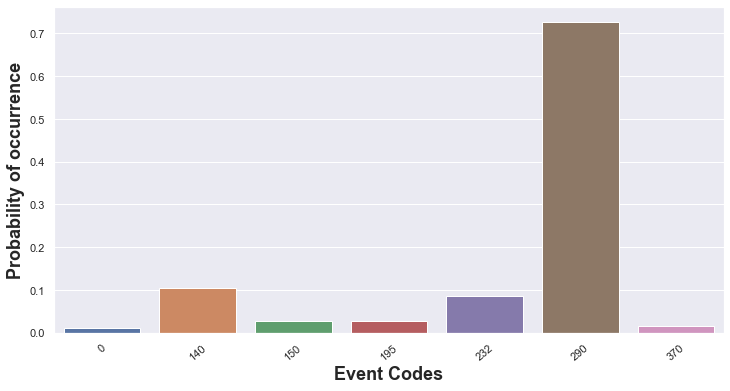

In [60]:
plt.figure(figsize = (12, 6))

sns.barplot(x = list(dictOutcome.keys()), y = list(dictOutcome.values()))
sns.set(font_scale=1)
plt.xticks(rotation=40)

plt.xlabel('Event Codes', fontsize = 18, fontweight = 'bold')
plt.ylabel('Probability of occurrence', fontsize = 18, fontweight = 'bold')

In [61]:
eventCodes[eventCodes['code']== 0]

Empty DataFrame
Columns: [code, meaning]
Index: []

### Backward inference

In [62]:
TP = np.array([[0.2, 0.2, 0.6], [0, 0.7, 0.3], [0.5, 0.5, 0]])

In [63]:
s = np.array([0.2, 0.6, 0.2])

In [64]:
for i in range(1000):
    s = np.dot(TP.transpose(), s)
    s = s/np.sum(s)

In [65]:
s

array([0.16853933, 0.56179775, 0.26966292])

In [66]:
tmp = TP.transpose()
for i in range(100):
    tmp = np.dot(TP.transpose(), tmp)

In [67]:
tmp

array([[0.16853933, 0.16853933, 0.16853933],
       [0.56179775, 0.56179775, 0.56179775],
       [0.26966292, 0.26966292, 0.26966292]])

In [68]:
np.dot(tmp, s)

array([0.16853933, 0.56179775, 0.26966292])